## **Exploratory Data Analysis of InsuranceCo**

### InsuranceCo has provided customer data that contains 8 columns of customer details and another table having name customer_policy data contains the policy details of the customer.



### The company intends to offer some discount in premium for certain customers. To do that they ask their Data scientist team to get some information. Hence, following tasks DS team decided to perform:



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Reading data from a csv file

df1 = pd.read_csv('customer_details.csv',header = None)
df2 = pd.read_csv('customer_policy_details.csv',header = None)

In [ ]:
##  1. Add the column names to both datasets:

df1.columns = ['customer_id','Gender','age','driving license present','region code','previously insured','vehicle age','vehicle damage']
df2.columns = ['customer_id','Annual premium(in Rs)','sales channel code','vintage','response']

In [ ]:
df1 #customer details

,customer_id,Gender,age,driving license present,region code,previously insured,vehicle age,vehicle damage
0,0.0,1,2.0,3.0,4.0,5.0,6,7
1,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
2,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
3,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
4,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381105,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381106,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381107,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381108,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [ ]:
df2 #customer policy details

,customer_id,Annual premium(in Rs),sales channel code,vintage,response
0,0.0,1.0,2.0,3.0,4.0
1,1.0,40454.0,26.0,217.0,1.0
2,2.0,33536.0,26.0,183.0,0.0
3,3.0,38294.0,26.0,27.0,1.0
4,4.0,28619.0,152.0,203.0,0.0
...,...,...,...,...,...
381105,381105.0,30170.0,26.0,88.0,0.0
381106,381106.0,40016.0,152.0,131.0,0.0
381107,381107.0,35118.0,160.0,161.0,0.0
381108,381108.0,44617.0,124.0,74.0,0.0


### 2.Checking and Cleaning Data Quality:
### Null values



#### 1. Generate a summary of count of all the null values column wise


In [ ]:
df1.isnull().sum()

customer_id                386
Gender                     368
age                        368
driving license present    393
region code                392
previously insured         381
vehicle age                381
vehicle damage             407
dtype: int64

In [ ]:
df2.isnull().sum()

customer_id              387
Annual premium(in Rs)    346
sales channel code       400
vintage                  388
response                 361
dtype: int64

#### Dropping null values for customer_id because central tendencies for id’s is not feasible.


In [ ]:
df1 = df1.dropna(subset = ['customer_id'])

In [ ]:
df1.isnull().sum()

customer_id                  0
Gender                     368
age                        366
driving license present    392
region code                391
previously insured         381
vehicle age                381
vehicle damage             406
dtype: int64

In [ ]:
df2 = df2.dropna(subset=['customer_id'])

In [ ]:
df2.isnull().sum()

customer_id                0
Annual premium(in Rs)    344
sales channel code       400
vintage                  388
response                 361
dtype: int64

#### Replacing all null values for numeric columns by mean.


In [ ]:
# df1
# Numeric columns = customer_id,age,driving_license_present, region_code,previously insured
# Categorical columns : Gender, vehicle_age, vehicle_damage

res = df1.dtypes
print("Datatypes of customer table:\n")
print(res)


Datatypes of customer table:

customer_id                float64
Gender                      object
age                        float64
driving license present    float64
region code                float64
previously insured         float64
vehicle age                 object
vehicle damage              object
dtype: object


In [ ]:
res = df2.dtypes
print("Datatypes of customer policy table:\n")
print(res)

# customer policy table contains only numeric data


Datatypes of customer policy table:

customer_id              float64
Annual premium(in Rs)    float64
sales channel code       float64
vintage                  float64
response                 float64
dtype: object


In [ ]:
# Numeric column null values replaced with mean

df1['age'].fillna(df1.age.mean(),inplace = True)

df1['region code'].fillna(df1['region code'].mean(),inplace = True)

df1['previously insured'].fillna(df1['previously insured'].mean(),inplace = True)

df1['driving license present'].fillna(df1['driving license present'].mean(),inplace = True)

df2['Annual premium(in Rs)'].fillna(df2['Annual premium(in Rs)'].mean(),inplace = True)

df2['sales channel code'].fillna(df2['sales channel code'].mean(),inplace = True)

df2['vintage'].fillna(df2.vintage.mean(),inplace = True)

df2.response.fillna(df2.response.mean(),inplace = True)




#### Replacing all null values for categorical columns by mode.


In [ ]:
df1.Gender.fillna(df1.Gender.mode()[0],inplace = True)

df1['vehicle age'].fillna(df1['vehicle age'].mode()[0],inplace = True)

df1['vehicle damage'].fillna(df1['vehicle damage'].mode()[0],inplace = True)

In [ ]:
# Categorical column NaN values replaced with mode
df1.isnull().sum()


customer_id                0
Gender                     0
age                        0
driving license present    0
region code                0
previously insured         0
vehicle age                0
vehicle damage             0
dtype: int64

In [ ]:
df2.isna().sum()

customer_id              0
Annual premium(in Rs)    0
sales channel code       0
vintage                  0
response                 0
dtype: int64

### Outliers



In [ ]:
df1.describe()

,customer_id,age,driving license present,region code,previously insured
count,380724.000000,380724.000000,380724.000000,380724.000000,380724.000000
mean,190548.275754,38.822691,0.997873,26.389377,0.458271
std,110017.094100,15.504920,0.046218,13.223703,0.498060
min,0.000000,2.000000,0.000000,0.000000,0.000000
25%,95268.750000,25.000000,1.000000,15.000000,0.000000
50%,190542.500000,36.000000,1.000000,28.000000,0.000000
75%,285822.250000,49.000000,1.000000,35.000000,1.000000
max,381109.000000,85.000000,3.000000,52.000000,5.000000


In [ ]:
df2.describe()

,customer_id,Annual premium(in Rs),sales channel code,vintage,response
count,380723.000000,380723.000000,380723.000000,380723.000000,380723.000000
mean,190546.991175,30563.919425,112.036398,154.346794,0.122536
std,110014.113098,17190.196338,54.177268,83.628346,0.327797
min,0.000000,1.000000,1.000000,3.000000,0.000000
25%,95275.500000,24416.000000,29.000000,82.000000,0.000000
50%,190536.000000,31656.000000,131.000000,154.000000,0.000000
75%,285818.500000,39391.500000,152.000000,227.000000,0.000000
max,381109.000000,540165.000000,163.000000,299.000000,4.000000


In [ ]:
## for a column X calculate Q1 = 25th percentile and Q3 = 75th percentile then IQR = Q3 – Q1 ) then to check outlier, anything lower than a Q1 – 1.5IQR or greater than Q3 + 1.5 IQR would be an outlier

In [ ]:
def find_outliers(df):
    q1 = df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr=q3-q1
    outlier = df[((df<(q1-1.5*iqr)))|(df>(q3+1.5*iqr))]
    return outlier
outliers = find_outliers(df1['age'])
print("Number of outliers:",len(outliers))
print("Max Number of outliers:",outliers.max())
print("Minimum outlier value:",outliers.min())

outliers = find_outliers(df1['vehicle age'])
print("Number of outliers:",len(outliers))
print("Max Number of outliers:",outliers.max())
print("Minimum outlier value:",outliers.min())




Number of outliers: 0
Max Number of outliers: nan
Minimum outlier value: nan


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
print("For Annual_salary(Rs)")
outliers = find_outliers(df2['Annual_premium'])
print("Number of outliers:",len(outliers))
print("Max Number of outliers:",outliers.max())
print("Minimum outlier value:",outliers.min())
print('\n'*5)
print("For sales channel code")
outliers = find_outliers(df2['sales_channel_code'])
print("Number of outliers:",len(outliers))
print("Max Number of outliers:",outliers.max())
print("Minimum outlier value:",outliers.min())
print('\n'*5)
print("For Vintage")
outliers = find_outliers(df2['vintage'])
print("Number of outliers:",len(outliers))
print("Max Number of outliers:",outliers.max())
print("Minimum outlier value:",outliers.min())
print('\n'*5)

For Annual_salary(Rs)
Number of outliers: 10332
Max Number of outliers: 540165.0
Minimum outlier value: 61858.0






For sales channel code
Number of outliers: 0
Max Number of outliers: nan
Minimum outlier value: nan






For Vintage
Number of outliers: 0
Max Number of outliers: nan
Minimum outlier value: nan








In [ ]:
def replace(df):
    q1 = df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr=q3-q1
    upper = df[~(df>(q3+1.5*iqr))].max()
    lower = df[~(df>(q3+1.5*iqr))].min()
    return df
replace(df2['Annual premium(in Rs)'])

0             1.0
1         40454.0
2         33536.0
3         38294.0
4         28619.0
           ...   
381105    30170.0
381106    40016.0
381107    35118.0
381108    44617.0
381109    41777.0
Name: Annual premium(in Rs), Length: 380723, dtype: float64

#### iii. White spaces

In [ ]:
df1.apply(lambda x:str.strip if x.dtype == 'object' else x)

,customer_id,Gender,age,driving_license_present,region_code,previously_insured,vehicle_age,vehicle_damage
0,1.0,<method 'strip' of 'str' objects>,44.0,1.0,28.0,0.0,<method 'strip' of 'str' objects>,<method 'strip' of 'str' objects>
1,2.0,<method 'strip' of 'str' objects>,76.0,1.0,3.0,0.0,<method 'strip' of 'str' objects>,<method 'strip' of 'str' objects>
2,3.0,<method 'strip' of 'str' objects>,47.0,1.0,28.0,0.0,<method 'strip' of 'str' objects>,<method 'strip' of 'str' objects>
3,4.0,<method 'strip' of 'str' objects>,21.0,1.0,11.0,1.0,<method 'strip' of 'str' objects>,<method 'strip' of 'str' objects>
4,5.0,<method 'strip' of 'str' objects>,29.0,1.0,41.0,1.0,<method 'strip' of 'str' objects>,<method 'strip' of 'str' objects>
...,...,...,...,...,...,...,...,...
381104,381105.0,<method 'strip' of 'str' objects>,74.0,1.0,26.0,1.0,<method 'strip' of 'str' objects>,<method 'strip' of 'str' objects>
381105,381106.0,<method 'strip' of 'str' objects>,30.0,1.0,37.0,1.0,<method 'strip' of 'str' objects>,<method 'strip' of 'str' objects>
381106,381107.0,<method 'strip' of 'str' objects>,21.0,1.0,30.0,1.0,<method 'strip' of 'str' objects>,<method 'strip' of 'str' objects>
381107,381108.0,<method 'strip' of 'str' objects>,68.0,1.0,14.0,0.0,<method 'strip' of 'str' objects>,<method 'strip' of 'str' objects>


#### iv Case correction

In [ ]:
df1 = df1.apply(lambda x:x.str.upper() if x.dtype == 'object'else x)
df1


,customer_id,Gender,age,driving license present,region code,previously insured,vehicle age,vehicle damage
0,0.0,1,2.0,3.0,4.0,5.0,6,7
1,1.0,MALE,44.0,1.0,28.0,0.0,> 2 YEARS,YES
2,2.0,MALE,76.0,1.0,3.0,0.0,1-2 YEAR,NO
3,3.0,MALE,47.0,1.0,28.0,0.0,> 2 YEARS,YES
4,4.0,MALE,21.0,1.0,11.0,1.0,< 1 YEAR,NO
...,...,...,...,...,...,...,...,...
381105,381105.0,MALE,74.0,1.0,26.0,1.0,1-2 YEAR,NO
381106,381106.0,MALE,30.0,1.0,37.0,1.0,< 1 YEAR,NO
381107,381107.0,MALE,21.0,1.0,30.0,1.0,< 1 YEAR,NO
381108,381108.0,FEMALE,68.0,1.0,14.0,0.0,> 2 YEARS,YES


In [ ]:
# vi. dropping duplicates

df1 = df1.drop_duplicates()
df2 = df2.drop_duplicates()

In [ ]:
#v. dummy data for categorical columns

dummy_data = pd.get_dummies(df1)
dummy_data


,customer_id,age,driving license present,region code,previously insured,Gender_1,Gender_FEMALE,Gender_MALE,vehicle age_1-2 YEAR,vehicle age_6,vehicle age_< 1 YEAR,vehicle age_> 2 YEARS,vehicle damage_7,vehicle damage_NO,vehicle damage_YES
0,0.0,2.0,3.0,4.0,5.0,1,0,0,0,1,0,0,1,0,0
1,1.0,44.0,1.0,28.0,0.0,0,0,1,0,0,0,1,0,0,1
2,2.0,76.0,1.0,3.0,0.0,0,0,1,1,0,0,0,0,1,0
3,3.0,47.0,1.0,28.0,0.0,0,0,1,0,0,0,1,0,0,1
4,4.0,21.0,1.0,11.0,1.0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381105,381105.0,74.0,1.0,26.0,1.0,0,0,1,1,0,0,0,0,1,0
381106,381106.0,30.0,1.0,37.0,1.0,0,0,1,0,0,1,0,0,1,0
381107,381107.0,21.0,1.0,30.0,1.0,0,0,1,0,0,1,0,0,1,0
381108,381108.0,68.0,1.0,14.0,0.0,0,1,0,0,0,0,1,0,0,1


### 3. Create a Master table for future use. Join the customer table and customer_policy table to get a master table using customer_id in both tables.



In [ ]:
master_data = pd.merge(df1,df2,on = 'customer_id' )
master_data

,customer_id,Gender,age,driving license present,region code,previously insured,vehicle age,vehicle damage,Annual premium(in Rs),sales channel code,vintage,response
0,0.0,1,2.0,3.0,4.0,5.0,6,7,1.0,2.0,3.0,4.0
1,1.0,MALE,44.0,1.0,28.0,0.0,> 2 YEARS,YES,40454.0,26.0,217.0,1.0
2,2.0,MALE,76.0,1.0,3.0,0.0,1-2 YEAR,NO,33536.0,26.0,183.0,0.0
3,3.0,MALE,47.0,1.0,28.0,0.0,> 2 YEARS,YES,38294.0,26.0,27.0,1.0
4,4.0,MALE,21.0,1.0,11.0,1.0,< 1 YEAR,NO,28619.0,152.0,203.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
380332,381105.0,MALE,74.0,1.0,26.0,1.0,1-2 YEAR,NO,30170.0,26.0,88.0,0.0
380333,381106.0,MALE,30.0,1.0,37.0,1.0,< 1 YEAR,NO,40016.0,152.0,131.0,0.0
380334,381107.0,MALE,21.0,1.0,30.0,1.0,< 1 YEAR,NO,35118.0,160.0,161.0,0.0
380335,381108.0,FEMALE,68.0,1.0,14.0,0.0,> 2 YEARS,YES,44617.0,124.0,74.0,0.0


In [ ]:
# Analysis
# checking if the data is balanced based on gender

master_data.groupby('Gender').count()


,customer_id,age,driving license present,region code,previously insured,vehicle age,vehicle damage,Annual premium(in Rs),sales channel code,vintage,response
Gender,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1
FEMALE,174485,174485,174485,174485,174485,174485,174485,174485,174485,174485,174485
MALE,205851,205851,205851,205851,205851,205851,205851,205851,205851,205851,205851


In [ ]:
#  i. Gender wise average annual premium

Genderwise = master_data.groupby(['Gender'])['Annual premium(in Rs)'].mean()


Genderwise

Gender
1             1.000000
FEMALE    30492.028401
MALE      30623.619204
Name: Annual premium(in Rs), dtype: float64

<AxesSubplot:xlabel='Gender'>

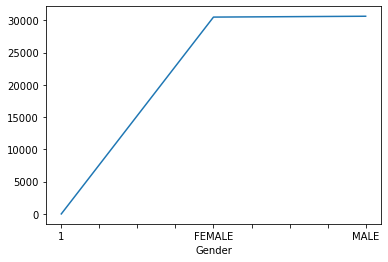

In [ ]:
Genderwise.plot()

In [ ]:
# Age wise annual premium

agewise = master_data.groupby(['age'])['Annual premium(in Rs)'].mean()
agewise

age
2.0         1.000000
20.0    26924.620083
21.0    30564.475756
22.0    30823.778021
23.0    30688.606239
            ...     
81.0    31201.571429
82.0    37705.379310
83.0    31012.727273
84.0    35440.818182
85.0    29792.363636
Name: Annual premium(in Rs), Length: 68, dtype: float64

<AxesSubplot:xlabel='age'>

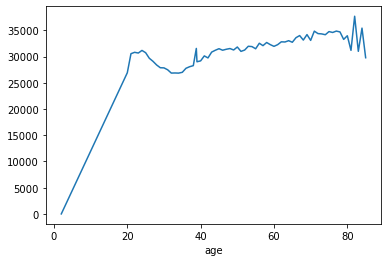

In [ ]:
agewise.plot()

In [ ]:
# vehicle age wise annual premium
veh_age = master_data.groupby('vehicle age')['Annual premium(in Rs)'].mean()
veh_age

vehicle age
1-2 YEAR     30524.629759
6                1.000000
< 1 YEAR     30115.716303
> 2 YEARS    35657.520784
Name: Annual premium(in Rs), dtype: float64

<AxesSubplot:xlabel='vehicle age'>

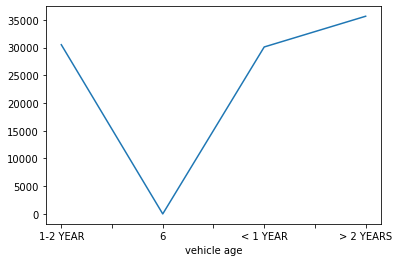

In [ ]:
veh_age.plot()

## Is there any relation between Person Age and annual premium?

In [ ]:
cor = master_data.age.corr(master_data['Annual premium(in Rs)'])

if cor < -0.5:
    print(cor,'\n Strong negative relationship found')
elif cor > 0.5:
    print(cor,'\n Strong positive relationship found')
elif cor > -0.5 and cor < 0.5:
    print(cor, '\nNo relationship found')


0.06772548154096464 
No relationship found
